# Gaining efficiencies
This chapter covers more complex efficiency tips and tricks. You'll learn a few useful built-in modules for writing efficient code and practice using set theory. You'll then learn about looping patterns in Python and how to make them more efficient.

#### Syllabus 
- Efficiently combining, counting, and iterating
- Combining Pokémon names and types
- Counting Pokémon from a sample
- Combinations of Pokémon
- Set theory
- Comparing Pokédexes
- Searching for Pokémon
- Gathering unique Pokémon
- Eliminating loops
- Gathering Pokémon without a loop
- Pokémon totals and averages without a loop
- Writing better loops
- One-time calculation loop
- Holistic conversion loop
- Bringing it all together: Pokémon z-scores

### Combining with Zips

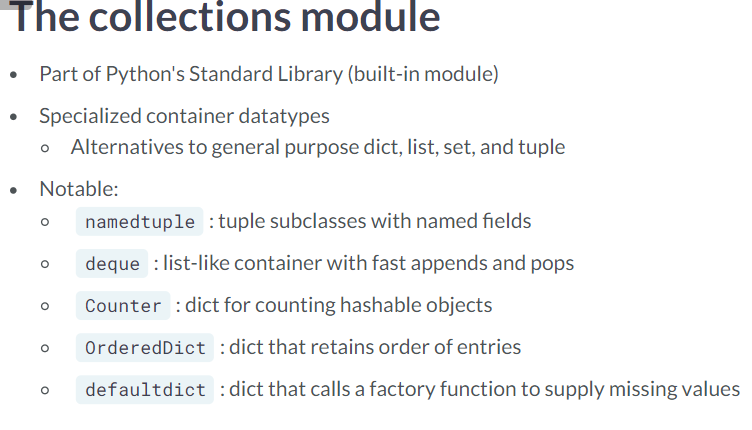

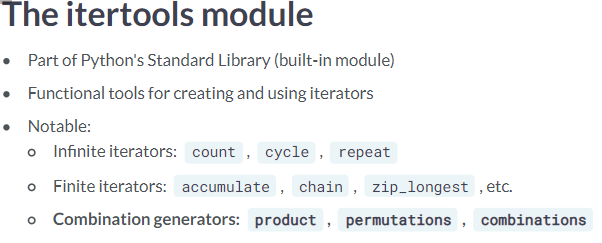

In [87]:
# counting in dictionary
from collections import Counter


### Combining Pokémon names and types
Three lists have been loaded into your session from a dataset that contains 720 Pokémon:

The names list contains the names of each Pokémon.
The primary_types list contains the corresponding primary type of each Pokémon.
The secondary_types list contains the corresponding secondary type of each Pokémon (nan if the Pokémon has only one type).


In [10]:
import pickle
# load data for the use
with open("data/pokemon_names.txt", "rb") as fp:   # Unpickling
    names = pickle.load(fp)

with open("data/pokemon_primary_types.txt", "rb") as fp:   # Unpickling
    primary_types = pickle.load(fp)

with open("data/pokemon_secondary_types.txt", "rb") as fp:   # Unpickling
    secondary_types = pickle.load(fp)  

We want to combine each Pokémon's name and types together so that you easily see a description of each Pokémon. Practice using zip() to accomplish this task.

In [11]:
# Combine names and primary_types
names_type1 = [*zip(names, primary_types)]

print(*names_type1[:5], sep='\n')

('Abomasnow', 'Grass')
('Abra', 'Psychic')
('Absol', 'Dark')
('Accelgor', 'Bug')
('Aerodactyl', 'Rock')


**Question:** Combine names, primary_types, and secondary_types (in that order) using zip() and unpack the zip object into a new list.

In [13]:
# Combine all three lists together
names_types = list(zip(names, primary_types, secondary_types))

print(*names_types[:5], sep='\n')

('Abomasnow', 'Grass', 'Ice')
('Abra', 'Psychic', nan)
('Absol', 'Dark', nan)
('Accelgor', 'Bug', nan)
('Aerodactyl', 'Rock', 'Flying')


Use zip() to combine the first five items from the names list and the first three items from the primary_types list.

**Note:** Did you notice that if you provide zip() with objects of differing lengths, it will only combine until the smallest lengthed object is exhausted?

In [14]:
# Combine five items from names and three items from primary_types
differing_lengths = [*zip(names[:5], primary_types[:3])]

print(*differing_lengths, sep='\n')

('Abomasnow', 'Grass')
('Abra', 'Psychic')
('Absol', 'Dark')


### Counting Pokémon from a sample
A sample of 500 Pokémon has been generated, and three lists from this sample have been loaded into your session:

The names list contains the names of each Pokémon in the sample.
The primary_types list containing the corresponding primary type of each Pokémon in the sample.
The generations list contains the corresponding generation of each Pokémon in the sample.
You want to quickly gather a few counts from these lists to better understand the sample that was generated. Use Counter from the collections module to explore what types of Pokémon are in your sample, what generations they come from, and how many Pokémon have a name that starts with a specific letter.

Counter has already been imported into your session for convenience.

In [22]:
with open("data/pokemon_generations.txt", "rb") as fp:   # Unpickling
    generations = pickle.load(fp) 
    
with open("data/pokemon_names_sample.txt", "rb") as fp:   # Unpickling
    names = pickle.load(fp) 
    
with open("data/pokemon_primary_types_sample.txt", "rb") as fp:   # Unpickling
    primary_types = pickle.load(fp)  

In [23]:
from collections import Counter
# Collect the count of primary types
type_count = Counter(primary_types)
print(type_count, '\n')

# Collect the count of generations
gen_count = Counter(generations)
print(gen_count, '\n')

# Use list comprehension to get each Pokémon's starting letter
starting_letters = [name[0] for name in names]

# Collect the count of Pokémon for each starting_letter
starting_letters_count = Counter(starting_letters)
print(starting_letters_count)

Counter({'Water': 66, 'Normal': 64, 'Bug': 51, 'Grass': 47, 'Psychic': 31, 'Rock': 29, 'Fire': 27, 'Electric': 25, 'Ground': 23, 'Fighting': 23, 'Poison': 22, 'Steel': 18, 'Ice': 16, 'Fairy': 16, 'Dragon': 16, 'Ghost': 13, 'Dark': 13}) 

Counter({5: 122, 3: 103, 1: 99, 4: 78, 2: 51, 6: 47}) 

Counter({'S': 83, 'C': 46, 'D': 33, 'M': 32, 'L': 29, 'G': 29, 'B': 28, 'P': 23, 'A': 22, 'K': 20, 'E': 19, 'W': 19, 'T': 19, 'F': 18, 'H': 15, 'R': 14, 'N': 13, 'V': 10, 'Z': 8, 'J': 7, 'I': 4, 'O': 3, 'Y': 3, 'U': 2, 'X': 1})


##### Combinations of Pokémon
Ash, a Pokémon trainer, encounters a group of five Pokémon. These Pokémon have been loaded into a list within your session (called pokemon) and printed into the console for your convenience.

Ash would like to try to catch some of these Pokémon, but his Pokédex can only store two Pokémon at a time. Let's use combinations from the itertools module to see what the possible pairs of Pokémon are that Ash could catch.

In [25]:
pokemon = ['Geodude', 'Cubone', 'Lickitung', 'Persian', 'Diglett']
# Import combinations from itertools
from itertools import combinations

# Create a combination object with pairs of Pokémon
combos_obj = combinations(pokemon, 2)
print(type(combos_obj), '\n')

# Convert combos_obj to a list by unpacking
combos_2 = [*combos_obj]
print(combos_2, '\n')

# Collect all possible combinations of 4 Pokémon directly into a list
combos_4 = [*combinations(pokemon, 4)]
print(combos_4)


<class 'itertools.combinations'> 

[('Geodude', 'Cubone'), ('Geodude', 'Lickitung'), ('Geodude', 'Persian'), ('Geodude', 'Diglett'), ('Cubone', 'Lickitung'), ('Cubone', 'Persian'), ('Cubone', 'Diglett'), ('Lickitung', 'Persian'), ('Lickitung', 'Diglett'), ('Persian', 'Diglett')] 

[('Geodude', 'Cubone', 'Lickitung', 'Persian'), ('Geodude', 'Cubone', 'Lickitung', 'Diglett'), ('Geodude', 'Cubone', 'Persian', 'Diglett'), ('Geodude', 'Lickitung', 'Persian', 'Diglett'), ('Cubone', 'Lickitung', 'Persian', 'Diglett')]


### Set Theory
- have set operations 
- fast membership testing for sets than lists

#### Comparing Pokédexes
Two Pokémon trainers, Ash and Misty, would like to compare their individual collections of Pokémon. Let's see what Pokémon they have in common and what Pokémon Ash has that Misty does not.

Both Ash and Misty's Pokédex (their collection of Pokémon) have been loaded into your session as lists called ash_pokedex and misty_pokedex. They have been printed into the console for your convenience.

In [27]:
ash_pokedex  = ['Pikachu', 'Bulbasaur', 'Koffing', 'Spearow', 'Vulpix', 'Wigglytuff', 'Zubat', 'Rattata', 'Psyduck', 'Squirtle'] 

misty_pokedex =  ['Krabby', 'Horsea', 'Slowbro', 'Tentacool', 'Vaporeon', 'Magikarp', 'Poliwag', 'Starmie', 'Psyduck', 'Squirtle']

# Convert both lists to sets
ash_set = set(ash_pokedex)
misty_set = set(misty_pokedex)

# Find the Pokémon that exist in both sets
both = ash_set.intersection(misty_set)
print(both)

# Find the Pokémon that Ash has and Misty does not have
ash_only = ash_set.difference(misty_set)
print(ash_only)

# Find the Pokémon that are in only one set (not both)
unique_to_set = ash_set.symmetric_difference(misty_set)
print(unique_to_set)

{'Squirtle', 'Psyduck'}
{'Wigglytuff', 'Koffing', 'Vulpix', 'Bulbasaur', 'Rattata', 'Zubat', 'Pikachu', 'Spearow'}
{'Magikarp', 'Horsea', 'Wigglytuff', 'Koffing', 'Krabby', 'Vulpix', 'Vaporeon', 'Bulbasaur', 'Tentacool', 'Poliwag', 'Rattata', 'Slowbro', 'Zubat', 'Pikachu', 'Starmie', 'Spearow'}


#### Searching for Pokémon
Two Pokémon trainers, Ash and Brock, have a collection of ten Pokémon each. Each trainer's Pokédex (their collection of Pokémon) has been loaded into your session as lists called ash_pokedex and brock_pokedex respectively.

You'd like to see if certain Pokémon are members of either Ash or Brock's Pokédex.

Let's compare using a set versus using a list when performing this membership testing.

Convert Brock's Pokédex list (brock_pokedex) to a set called brock_pokedex_set.

In [33]:


# Check if Psyduck is in Ash's list and Brock's set
print('Psyduck' in ash_pokedex )
print('Psyduck'in ash_set)

True
True


In [35]:
# check which one is faster
%timeit 'Psyduck' in ash_pokedex 
%timeit set(ash_pokedex)
%timeit 'Psyduck'in ash_set

170 ns ± 15.1 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
367 ns ± 11.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
54.2 ns ± 6.86 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Gathering unique Pokémon
A sample of 500 Pokémon has been created with replacement (meaning a Pokémon could be selected more than once and duplicates exist within the sample).

Three lists have been loaded into your session:

- The names list contains the names of each Pokémon in the sample.
- The primary_types list containing the corresponding primary type of each Pokémon in the sample.
- The generations list contains the corresponding generation of each Pokémon in the sample.
- The below function was written to gather unique values from each list:
```python
def find_unique_items(data):
    uniques = []

    for item in data:
        if item not in uniques:
            uniques.append(item)

    return uniques
```
Let's compare the above function to using the set data type for collecting unique items.

In [37]:
def find_unique_items(data):
    uniques = []

    for item in data:
        if item not in uniques:
            uniques.append(item)

    return uniques

uniq_names_func = find_unique_items(names)
print(len(uniq_names_func))

# Convert the names list to a set to collect unique Pokémon names
uniq_names_set = set(names)
print(len(uniq_names_set))

# Check that both unique collections are equivalent
print(sorted(uniq_names_func) == sorted(uniq_names_set))

369
369
True


In [38]:
%timeit uniq_names_func = find_unique_items(names)
%timeit uniq_names_set = set(names)

1.24 ms ± 70.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
15.9 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [39]:
# Use the best approach to collect unique primary types and generations
uniq_types = set(primary_types) 
uniq_gens = set(generations)
print(uniq_types, uniq_gens, sep='\n') 

{'Water', 'Fire', 'Bug', 'Fairy', 'Ghost', 'Dark', 'Grass', 'Ice', 'Rock', 'Steel', 'Ground', 'Fighting', 'Dragon', 'Electric', 'Normal', 'Psychic', 'Poison'}
{1, 2, 3, 4, 5, 6}


## Eliminating Loops
- looping patterns 
    - for loop
    - while loop 
    - nested loop
- costly 
- eliminating loops ==> fewer lines ==> better readibily 
- can use `itertools` or `numpy` to eliminate loops

Gathering Pokémon without a loop
A list containing 720 Pokémon has been loaded into your session as poke_names. Another list containing each Pokémon's corresponding generation has been loaded as poke_gens.

A for loop has been created to filter the Pokémon that belong to generation one or two, and collect the number of letters in each Pokémon's name:
```python
gen1_gen2_name_lengths_loop = []

for name,gen in zip(poke_names, poke_gens):
    if gen < 3:
        name_length = len(name)
        poke_tuple = (name, name_length)
        gen1_gen2_name_lengths_loop.append(poke_tuple)
```                                           

In [50]:
import pickle
# load data for the use
with open("data/pokemon_generations.txt", "rb") as fp:   # Unpickling
    poke_gens = pickle.load(fp)     
with open("data/pokemon_names_sample.txt", "rb") as fp:   # Unpickling
    poke_names = pickle.load(fp) 

In [52]:
gen1_gen2_name_lengths_loop = []

for name,gen in zip(poke_names, poke_gens):
    if gen < 3:
        name_length = len(name)
        poke_tuple = (name, name_length)
        gen1_gen2_name_lengths_loop.append(poke_tuple)

In [53]:
# Collect Pokémon that belong to generation 1 or generation 2
gen1_gen2_pokemon = [name for name,gen in zip(poke_names, poke_gens) if gen in [1, 2]]

# Create a map object that stores the name lengths
name_lengths_map = map(len, gen1_gen2_pokemon)

# Combine gen1_gen2_pokemon and name_lengths_map into a list
gen1_gen2_name_lengths = [*name_lengths_map]

print(gen1_gen2_name_lengths_loop[:5])
print(gen1_gen2_name_lengths[:5])

[('Seel', 4), ('Nidorino', 8), ('Fearow', 6), ('Exeggutor', 9), ('Mew', 3)]
[4, 8, 6, 9, 3]


### Pokémon totals and averages without a loop
A list of 720 Pokémon has been loaded into your session called names. Each Pokémon's corresponding statistics has been loaded as a NumPy array called stats. Each row of stats corresponds to a Pokémon in names and each column represents an individual Pokémon stat (HP, Attack, Defense, Special Attack, Special Defense, and Speed respectively.)

You want to gather each Pokémon's total stat value (i.e., the sum of each row in stats) and each Pokémon's average stat value (i.e., the mean of each row in stats) so that you find the strongest Pokémon.

The below for loop was written to collect these values:
```python
poke_list = []

for pokemon,row in zip(names, stats):
    total_stats = np.sum(row)
    avg_stats = np.mean(row)
    poke_list.append((pokemon, total_stats, avg_stats))
```

In [60]:
import pickle
import numpy as np

In [59]:
with open("data/pokemon_stats.txt", "rb") as fp:   # Unpickling
    stats = pickle.load(fp)   

In [66]:
poke_list = []

for pokemon,row in zip(names, stats):
    total_stats = np.sum(row)
    avg_stats = np.mean(row)
    poke_list.append((pokemon, total_stats, avg_stats))

In [67]:
# Create a total stats array
total_stats_np = stats.sum(axis=1)

# Create an average stats array
avg_stats_np = stats.mean(axis=1)

# Combine names, total_stats_np, and avg_stats_np into a list
poke_list_np = [*zip(names, total_stats_np, avg_stats_np)]

print(poke_list_np == poke_list, '\n')
print(poke_list_np[:3])
print(poke_list[:3], '\n')
top_3 = sorted(poke_list_np, key=lambda x: x[1], reverse=True)[:3]
print('3 strongest Pokémon:\n{}'.format(top_3))

True 

[('Seel', 494, 82.33333333333333), ('Nidorino', 310, 51.666666666666664), ('Fearow', 465, 77.5)]
[('Seel', 494, 82.33333333333333), ('Nidorino', 310, 51.666666666666664), ('Fearow', 465, 77.5)] 

3 strongest Pokémon:
[('Lumineon', 770, 128.33333333333334), ('Gardevoir', 770, 128.33333333333334), ('Heatmor', 720, 120.0)]


## Writing better loops
- For loops that are unavoidable
- anything that can be done once should be moved outside


##### One-time calculation loop
A list of integers that represents each Pokémon's generation has been loaded into your session called generations. You'd like to gather the counts of each generation and determine what percentage each generation accounts for out of the total count of integers.

The below loop was written to accomplish this task:
```python
for gen,count in gen_counts.items():
    total_count = len(generations)
    gen_percent = round(count / total_count * 100, 2)
    print(
      'generation {}: count = {:3} percentage = {}'
      .format(gen, count, gen_percent)
    )
```    
Let's make this loop more efficient by moving a one-time calculation outside the loop.

In [68]:
# Import Counter
from collections import Counter

# Collect the count of each generation
gen_counts = Counter(generations)

# Improve for loop by moving one calculation above the loop
total_count = len(generations)

for gen,count in gen_counts.items():
    gen_percent = round(count / total_count * 100, 2)
    print('generation {}: count = {:3} percentage = {}'
          .format(gen, count, gen_percent))

generation 1: count =  99 percentage = 19.8
generation 5: count = 122 percentage = 24.4
generation 3: count = 103 percentage = 20.6
generation 6: count =  47 percentage = 9.4
generation 4: count =  78 percentage = 15.6
generation 2: count =  51 percentage = 10.2


#### Holistic conversion loop
A list of all possible Pokémon types has been loaded into your session as pokemon_types. It's been printed in the console for convenience.

You'd like to gather all the possible pairs of Pokémon types. You want to store each of these pairs in an individual list with an enumerated index as the first element of each list. This allows you to see the total number of possible pairs and provides an indexed label for each pair.

The below loop was written to accomplish this task:
```python
enumerated_pairs = []

for i,pair in enumerate(possible_pairs, 1):
    enumerated_pair_tuple = (i,) + pair
    enumerated_pair_list = list(enumerated_pair_tuple)
    enumerated_pairs.append(enumerated_pair_list)
```
    Let's make this loop more efficient using a holistic conversion.

In [71]:
pokemon_types = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']

In [72]:
# Collect all possible pairs using combinations()
possible_pairs = [*combinations(pokemon_types, 2)]

# Create an empty list called enumerated_tuples
enumerated_tuples = [] 

# Add a line to append each enumerated_pair_tuple to the empty list above
for i,pair in enumerate(possible_pairs, 1):
    enumerated_pairs = (i,) + pair
    enumerated_tuples.append(enumerated_pairs)

# Convert all tuples in enumerated_tuples to a list
enumerated_pairs = [*map(list, enumerated_tuples)]
print(enumerated_pairs)

[[1, 'Bug', 'Dark'], [2, 'Bug', 'Dragon'], [3, 'Bug', 'Electric'], [4, 'Bug', 'Fairy'], [5, 'Bug', 'Fighting'], [6, 'Bug', 'Fire'], [7, 'Bug', 'Flying'], [8, 'Bug', 'Ghost'], [9, 'Bug', 'Grass'], [10, 'Bug', 'Ground'], [11, 'Bug', 'Ice'], [12, 'Bug', 'Normal'], [13, 'Bug', 'Poison'], [14, 'Bug', 'Psychic'], [15, 'Bug', 'Rock'], [16, 'Bug', 'Steel'], [17, 'Bug', 'Water'], [18, 'Dark', 'Dragon'], [19, 'Dark', 'Electric'], [20, 'Dark', 'Fairy'], [21, 'Dark', 'Fighting'], [22, 'Dark', 'Fire'], [23, 'Dark', 'Flying'], [24, 'Dark', 'Ghost'], [25, 'Dark', 'Grass'], [26, 'Dark', 'Ground'], [27, 'Dark', 'Ice'], [28, 'Dark', 'Normal'], [29, 'Dark', 'Poison'], [30, 'Dark', 'Psychic'], [31, 'Dark', 'Rock'], [32, 'Dark', 'Steel'], [33, 'Dark', 'Water'], [34, 'Dragon', 'Electric'], [35, 'Dragon', 'Fairy'], [36, 'Dragon', 'Fighting'], [37, 'Dragon', 'Fire'], [38, 'Dragon', 'Flying'], [39, 'Dragon', 'Ghost'], [40, 'Dragon', 'Grass'], [41, 'Dragon', 'Ground'], [42, 'Dragon', 'Ice'], [43, 'Dragon', 'Nor

### Bringing it all together: Pokémon z-scores
A list of 720 Pokémon has been loaded into your session as names. Each Pokémon's corresponding Health Points is stored in a NumPy array called hps. You want to analyze the Health Points using the z-score to see how many standard deviations each Pokémon's HP is from the mean of all HPs.

The below code was written to calculate the HP z-score for each Pokémon and gather the Pokémon with the highest HPs based on their z-scores:
```python
poke_zscores = []

for name,hp in zip(names, hps):
    hp_avg = hps.mean()
    hp_std = hps.std()
    z_score = (hp - hp_avg)/hp_std
    poke_zscores.append((name, hp, z_score))
highest_hp_pokemon = []

for name,hp,zscore in poke_zscores:
    if zscore > 2:
        highest_hp_pokemon.append((name, hp, zscore))
```

In [81]:
import pickle
with open("data/pokemon_hps.txt", "rb") as fp:   # Unpickling
     hps = pickle.load(fp)
with open("data/pokemon_names.txt", "rb") as fp:   # Unpickling
     names = pickle.load(fp)    
len(hps)==len(names)

True

In [83]:
# Calculate the total HP avg and total HP standard deviation
hp_avg = hps.mean(axis=0)
hp_std = hps.std(axis=0)

# Use NumPy to eliminate the previous for loop
z_scores = (hps - hp_avg)/hp_std

# Combine names, hps, and z_scores
poke_zscores2 = [*zip(names, hps, z_scores)]
print(*poke_zscores2[:3], sep='\n')

# Use list comprehension with the same logic as the highest_hp_pokemon code block
highest_hp_pokemon2 = [(name,hp, z_score) for name,hp,z_score in poke_zscores2 if z_score > 2]
print(*highest_hp_pokemon2, sep='\n')

('Abomasnow', 80.0, 0.46797638117739043)
('Abra', 60.0, -0.3271693284337512)
('Absol', 131.0, 2.4955979406858013)
('Absol', 131.0, 2.4955979406858013)
('Bonsly', 127.0, 2.3365687987635733)
('Caterpie', 122.0, 2.137782371360788)
('Cofagrigus', 133.0, 2.575112511646916)
('Cresselia', 126.0, 2.296811513283016)
('Dewgong', 122.0, 2.137782371360788)
('Druddigon', 126.0, 2.296811513283016)
('Froakie', 123.0, 2.1775396568413448)
('Kadabra', 135.0, 2.65462708260803)
('Klang', 123.0, 2.1775396568413448)
('Kricketune', 122.0, 2.137782371360788)
('Lumineon', 129.0, 2.4160833697246873)
('Magnemite', 137.0, 2.734141653569144)
('Nidorina', 119.0, 2.0185105149191167)
('Onix', 126.0, 2.296811513283016)
('Prinplup', 124.0, 2.217296942321902)
('Skuntank', 128.0, 2.3763260842441305)
('Swellow', 125.0, 2.2570542278024592)


#### `%%timeit`

In [84]:
%%timeit
poke_zscores = []

for name,hp in zip(names, hps):
    hp_avg = hps.mean()
    hp_std = hps.std()
    z_score = (hp - hp_avg)/hp_std
    poke_zscores.append((name, hp, z_score))
highest_hp_pokemon = []

for name,hp,zscore in poke_zscores:
    if zscore > 2:
        highest_hp_pokemon.append((name, hp, zscore))

24.8 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [85]:
%%timeit
# Calculate the total HP avg and total HP standard deviation
hp_avg = hps.mean(axis=0)
hp_std = hps.std(axis=0)
# Use NumPy to eliminate the previous for loop
z_scores = (hps - hp_avg)/hp_std
# Combine names, hps, and z_scores
poke_zscores2 = [*zip(names, hps, z_scores)]
# Use list comprehension with the same logic as the highest_hp_pokemon code block
highest_hp_pokemon2 = [(name,hp, z_score) for name,hp,z_score in poke_zscores2 if z_score > 2]

563 µs ± 40 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
